# **Define the Neural Network Architecture**

In [ ]:
class ThreeLayerNN:
    def __init__(self, input_dim, hidden_dim, output_dim):
        # Layer 1 weights and biases
        self.W1 = tf.Variable(tf.random.normal([input_dim, hidden_dim], stddev=0.1))
        self.b1 = tf.Variable(tf.zeros([hidden_dim]))

        # Layer 2 weights and biases
        self.W2 = tf.Variable(tf.random.normal([hidden_dim, hidden_dim], stddev=0.1))
        self.b2 = tf.Variable(tf.zeros([hidden_dim]))

        # Output layer weights and biases
        self.W3 = tf.Variable(tf.random.normal([hidden_dim, output_dim], stddev=0.1))
        self.b3 = tf.Variable(tf.zeros([output_dim]))

    def forward(self, x):
        # Forward pass for layer 1
        z1 = tf.einsum('ij,jk->ik', x, self.W1) + self.b1
        a1 = tf.nn.relu(z1)

        # Forward pass for layer 2
        z2 = tf.einsum('ij,jk->ik', a1, self.W2) + self.b2
        a2 = tf.nn.relu(z2)

        # Forward pass for the output layer
        y = tf.einsum('ij,jk->ik', a2, self.W3) + self.b3
        return y

    @property
    def trainable_variables(self):
        # Return all the variables that the model should update during training
        return [self.W1, self.b1, self.W2, self.b2, self.W3, self.b3]


# **Split the Data into Training and Testing Sets**

In [ ]:
import numpy as np
import tensorflow as tf

# Parameters for the equation
a, b, c, d = 2, 1.5, -3, 0.5

# Generate synthetic data
np.random.seed(42) # Ensure reproducibility
x1 = np.random.uniform(-1, 1, 1000)
x2 = np.random.uniform(-1, 1, 1000)
x3 = np.random.uniform(-1, 1, 1000)
y = a * (x1**2) + b * x2 + c * np.sin(x3) + d

# Combine x1, x2, x3 into a single array
X = np.vstack((x1, x2, x3)).T

# Split the data into training and testing sets
train_size = int(0.8 * len(X))  # 80% of data for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Convert training and testing data to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.float32)


# **Define the Loss Function and the Training Loop**

In [ ]:
# Loss function: Mean Squared Error
def loss_fn(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Optimizer
optimizer = tf.optimizers.Adam(learning_rate=0.01)

# Training loop
def train(model, X_train, y_train, epochs):
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            y_pred = model.forward(X_train)
            loss = loss_fn(y_pred, y_train)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.numpy()}')

# Initialize the model
model = ThreeLayerNN(input_dim=3, hidden_dim=64, output_dim=1)

# Train the model
train(model, X_train_tf, y_train_tf, epochs=100)


Epoch 0, Loss: 4.983747959136963
Epoch 10, Loss: 3.5981040000915527
Epoch 20, Loss: 3.5242793560028076
Epoch 30, Loss: 3.4888412952423096
Epoch 40, Loss: 3.4827303886413574
Epoch 50, Loss: 3.48036789894104
Epoch 60, Loss: 3.477179765701294
Epoch 70, Loss: 3.474802255630493
Epoch 80, Loss: 3.473856210708618
Epoch 90, Loss: 3.473275899887085


# **Evaluation**

Test Loss: 3.7725932598114014


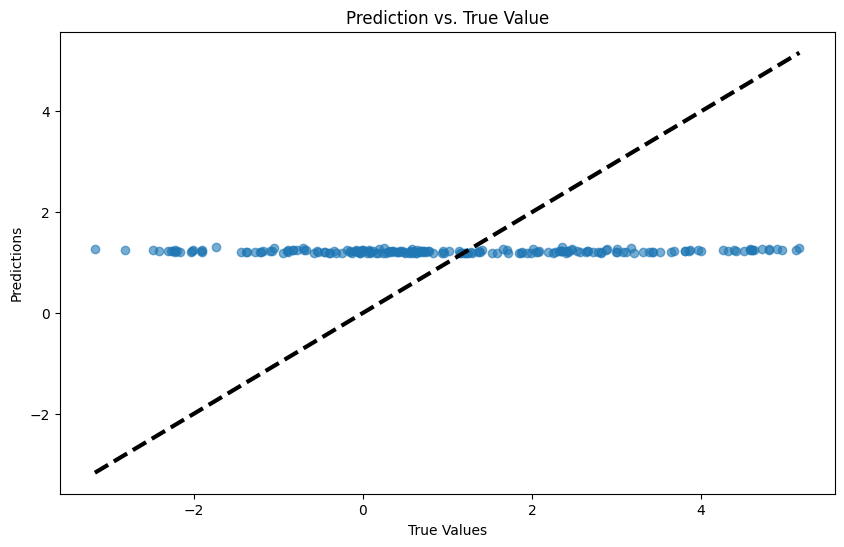

In [ ]:
# Evaluate on test data
y_pred_test = model.forward(X_test_tf).numpy()

# Calculate test loss
test_loss = loss_fn(tf.convert_to_tensor(y_pred_test, dtype=tf.float32), y_test_tf).numpy()
print(f'Test Loss: {test_loss}')

# Visualize predictions vs. true values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Prediction vs. True Value')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()
